# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [8]:
import numpy as np
import math 
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
#Importing HouseholdSpecializationModelClass
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

c:\Users\katja\Documents\6. semester\projects-2023-kernen-af-kulten-1\inauguralproject\HouseholdSpecializationModel.py:74: RuntimeWarning: divide by zero encountered in reciprocal
  H=((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


       0.5   1.0   1.5
0.25  0.545 0.308 0.214
0.50  1.000 1.000 1.000
0.75  1.833 3.250 4.667
0.75 1.5


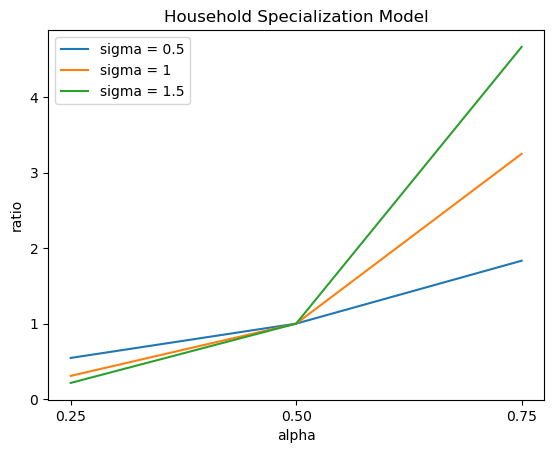

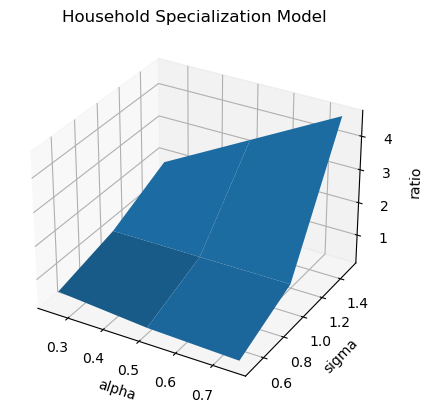

0.5 1


In [9]:
#gives HouseholdSpecializationModelClass a shorter name to call 
hm = HouseholdSpecializationModelClass()

#Creates vectors for the three cases for each variable:
alpha_vec=[0.25, 0.5, 0.75]
sigma_vec= [0.5, 1, 1.5]
#print(alpha_vec, sigma_vec, hm.par.alpha, hm.par.sigma)

#TABEL LØSNING
#Creates a table with the result:
def print_table(alpha_vec,sigma_vec):
    
    # a. empty text
    text = ''
    
    # b. top header (the sigma-values)
    text += f'{"":1s}{"":3s}{sigma_vec[0]:6.1f}{"":3s}{sigma_vec[1]:1.1f}{"":3s}{sigma_vec[2]:1.1f}\n'

    
    # c. body
    # Creates a loop over the values in the two vectors, where it calculates the HF/HM ratio for each of the 9 combinations of the values in the vectors
    for i,alpha in enumerate(alpha_vec):
        if i > 0:
            text += '\n' # line shift
        text += f'{alpha:1.2f} ' # left header (alpha values)
        for j, sigma in enumerate(sigma_vec):
            hm.par.alpha=alpha
            hm.par.sigma=sigma
            text += f'{hm.solve_discrete().ratio :6.3f}'
    
    # d. prints the table
    print(text) 
print_table(alpha_vec,sigma_vec)

print(hm.par.alpha, hm.par.sigma) 
#sees that the values has changed to 0.75 and 1.5, so resets at the bottom of the code

#KLASSISK GRAF-LØSNING
def get_data(alpha_vec, sigma_vec):
    data = []
    for i, alpha in enumerate(alpha_vec):
        row = [alpha]
        for j, sigma in enumerate(sigma_vec):
            hm.par.alpha = alpha
            hm.par.sigma = sigma
            ratio = hm.solve_discrete().ratio
            row.append(ratio)
        data.append(tuple(row))
    return data

import matplotlib.pyplot as plt

data = get_data(alpha_vec, sigma_vec)

plt.figure()
for i, sigma in enumerate(sigma_vec):
    x = [row[0] for row in data]
    y = [row[i+1] for row in data]
    plt.plot(x, y, label=f'sigma = {sigma}')

plt.xlabel('alpha')
plt.xticks(alpha_vec)
plt.ylabel('ratio')
plt.title('Household Specialization Model')
plt.legend()
plt.show()

#3D GRAF LØSNING
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D


data = []
for i, alpha in enumerate(alpha_vec):
    row = []
    for j, sigma in enumerate(sigma_vec):
        hm.par.alpha = alpha
        hm.par.sigma = sigma
        ratio = hm.solve_discrete().ratio
        row.append(ratio)
    data.append(row)

alpha_grid, sigma_grid = np.meshgrid(alpha_vec, sigma_vec)
ratio_grid = np.array(data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(alpha_grid, sigma_grid, ratio_grid)
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_xticks = alpha_vec
ax.set_yticks = sigma_vec
ax.set_zlabel('ratio')
ax.set_title('Household Specialization Model')
plt.show()

#Resets alpha and sigma values
hm.par.alpha=0.5
hm.par.sigma=1
print(hm.par.alpha, hm.par.sigma)


From the ilustration we can se that the ratio is unaffected by sigma when alpha is one half, The ratio also becomes bigger as alpha becomes bigger. For large values of sigma the ratio is more affected by the value of alpha and for small values of sigma the ratio is less affected by the value of alpha.

# Question 2

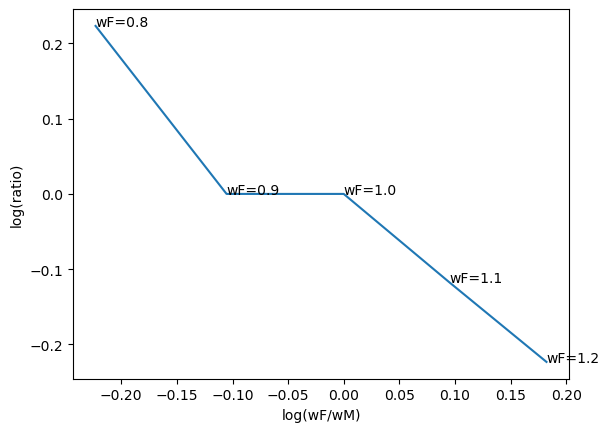

In [10]:
import math
import matplotlib.pyplot as plt
#resets parameters
hm.par.alpha=0.5
hm.par.sigma=1
hm.par.wF=1

#Creates the vector for the needed wagevalues
wF_vector = [0.8, 0.9, 1.0, 1.1, 1.2]
#Creates two empty vectors to be used for the graph
x_data = []
y_data = []

# Calculates the log(ratio) and log wage ratio for each of the wF values and saves the results in the x and y vectors
for j, wage in enumerate(wF_vector):
    hm.par.wF = wage
    logwratio = math.log(hm.par.wF/hm.par.wM)
    logratio = math.log(hm.solve_discrete().ratio)
    x_data.append(logwratio)
    y_data.append(logratio)

# creates plot
plt.plot(x_data, y_data)
plt.xlabel('log(wF/wM)')
plt.ylabel('log(ratio)')

# add wF values as labels for each of the datapoints
for i in range(len(wF_vector)):
    plt.text(x_data[i], y_data[i], f"wF={wF_vector[i]}")

# Shows the graph
plt.show()



From the plot we observe that the log ratio fals as the log wage ratio rises, the interpretation of this is that the female household contribution falls compared to male household contribution when the female wage rises compared the the male wage, this makes sens as higher wage creates an incentive to work insted of putting in the work hours at home, as the oppetunity cost of not woking rises. it should be noted that the ratio dose not change when the wage ratio is between 0.9 and 1. 

# Question 3

4.5 4.5 4.5 4.5


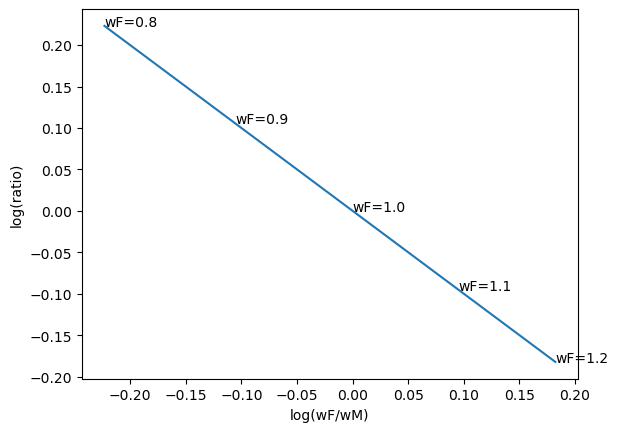

In [11]:
#resets parameters
hm.par.alpha=0.5
hm.par.sigma=1
hm.par.wF=1

#Calculating the optimal variables in the discrete function to find a good initial guess
print(hm.solve_discrete().HF, hm.solve_discrete().HM, hm.solve_discrete().LF, hm.solve_discrete().LM)

#Creates the vector for the needed wagevalues
wF_vector = [0.8, 0.9, 1.0, 1.1, 1.2]
#Creates two empty vectors to be used for the graph
x_data = []
y_data = []

# Calculates the log(ratio) and log wage ratio for each of the wF values and saves the results in the x and y vectors
for j, wage in enumerate(wF_vector):
    hm.par.wF = wage
    logwratio = math.log(hm.par.wF/hm.par.wM)
    logratio = math.log(hm.solve().ratio)
    x_data.append(logwratio)
    y_data.append(logratio)

# creates plot
plt.plot(x_data, y_data)
plt.xlabel('log(wF/wM)')
plt.ylabel('log(ratio)')

# add wF values as labels for each of the datapoints
for i in range(len(wF_vector)):
    plt.text(x_data[i], y_data[i], f"wF={wF_vector[i]}")

# Shows the graph
plt.show()


the work hours is now continuos insted of discreat but otherwise it is the same as question 2. The change from distreat to continuos means that the graf becomes linear and the ratio being strictly negativly affected by the wage reatio where the itution behind it is the same as for Q2.  

# Question 4 

Explain your code and procedure

c:\Users\katja\Documents\6. semester\projects-2023-kernen-af-kulten-1\inauguralproject\HouseholdSpecializationModel.py:74: RuntimeWarning: invalid value encountered in scalar power
  H=((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.


c:\Users\katja\Documents\6. semester\projects-2023-kernen-af-kulten-1\inauguralproject\HouseholdSpecializationModel.py:74: RuntimeWarning: divide by zero encountered in scalar power
  H=((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimization failed.
Optimal alpha: 0.9819855180239534
Optimal sigma: 0.10003901171748744


c:\Users\katja\Documents\6. semester\projects-2023-kernen-af-kulten-1\inauguralproject\HouseholdSpecializationModel.py:72: RuntimeWarning: invalid value encountered in scalar power
  H=HM**(1-par.alpha)*HF**par.alpha


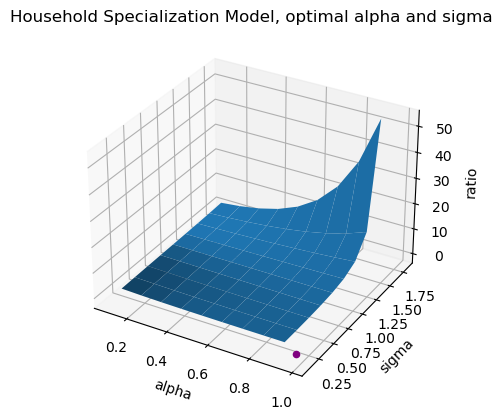

In [12]:
#resets parameters
hm.par.alpha=0.5
hm.par.sigma=1
hm.par.wF=1
hm.estimate()
alphaoptimum = hm.par.alpha
sigmaoptimum = hm.par.sigma

# V2 af løsningen til spg 1
hm = HouseholdSpecializationModelClass() #gives HouseholdSpecializationModelClass a shorter name to call
#Creates vectors for the three cases for each variable:
alpha_vec= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
sigma_vec = [0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8]

#TABEL LØSNING
#Creates a table with the result:

#3D GRAF LØSNING
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


data = []
for i, alpha in enumerate(alpha_vec):
    row = []
    for j, sigma in enumerate(sigma_vec):
        hm.par.alpha = alpha
        hm.par.sigma = sigma
        ratio = hm.solve().ratio
        row.append(ratio)
    data.append(row)

alpha_grid, sigma_grid = np.meshgrid(alpha_vec, sigma_vec)
ratio_grid = np.array(data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(alpha_grid, sigma_grid, ratio_grid)
ax.scatter(alphaoptimum, sigmaoptimum, 0, c="purple")
ax.set_xlabel('alpha')
ax.set_ylabel('sigma')
ax.set_xticks = alpha_vec
ax.set_yticks = sigma_vec
ax.set_zlabel('ratio')
ax.set_title('Household Specialization Model, optimal alpha and sigma')
plt.show()





We can see that in order for the data to fit the model, it would mean that women should be 0.98 productive in the household for the difference in hours put compared to wage ratio fit the model. This seems highly unlikely, and the model therefore does not seem to fit reality very well

# Question 5

In [4]:
hm = HouseholdSpecializationModelClass()
#resets parameters
hm.par.alpha=0.5
hm.par.sigma=1
hm.par.wF=1

hm.estimate_opg5()

print(hm.par.nu_M, hm.par.alpha)

c:\Users\katja\Documents\6. semester\projects-2023-kernen-af-kulten-1\inauguralproject\HouseholdSpecializationModel.py:236: RuntimeWarning: invalid value encountered in scalar power
  H=((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Optimization failed.
Optimization failed.


c:\Users\katja\Documents\6. semester\projects-2023-kernen-af-kulten-1\inauguralproject\HouseholdSpecializationModel.py:236: RuntimeWarning: overflow encountered in scalar power
  H=((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\katja\Documents\6. semester\projects-2023-kernen-af-kulten-1\inauguralproject\HouseholdSpecializationModel.py:236: RuntimeWarning: invalid value encountered in scalar add
  H=((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\katja\Documents\6. semester\projects-2023-kernen-af-kulten-1\inauguralproject\HouseholdSpecializationModel.py:239: RuntimeWarning: invalid value encountered in scalar power
  Q = C**par.omega*H**(1-par.omega)


Optimization failed.


c:\Users\katja\Documents\6. semester\projects-2023-kernen-af-kulten-1\inauguralproject\HouseholdSpecializationModel.py:314: RuntimeWarning: invalid value encountered in log
  y = np.log(sol.HF_vec_ny/sol.HM_vec_ny)


Optimal nu_M: 0.0014840896606445348
Optimal sigma: 0.1003753662109367
0.0014840896606445348 0.5


To change the model to fit the data better and have alpha=0.5, we changed the disutility function such that men and women have different disutility factors for working at home. We then minimized the error-function given in question 4 wrt. nu_M (the disutility factor for men) and sigma, to find what this parameter should be for the model to fit. We find that men's disutility should be 0.0015, while women's are 0.001. The error is therefore minimized when men's disutility from working at home is higher than women's